# pandas ...

.. is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

# 10분짜리 Pandas 따라하기

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- pandas를 구동 하기 위한 기본 imclude 들이다.  
- ipython 이나 jupyter를 이용하기 때문에, %pylab 명령을 이용하여 2번째, 3번째 과정을 생략하기도 한다.  
- pandas 내부는 C로 컴파일 되어 있고, 연산속도 가속을 위하여 일부 명령에 GIL 해제 하기도 한다


## 객체 생성

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

판다스는 기본 Series라는 단위로 이루어져 있고,  
Index와 Data로 이루어진 1차원 데이터다  
입력이 가능한 데이터형은 Python object 구체적인 제약은 없다.

list형, ndarray, dict 형을 주로 쓰는데, dict형은 key가 Index로 차용된다



In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828
2013-01-03,-0.561013,-2.697689,0.934477,1.654450
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778
2013-01-05,-0.156187,1.911771,-0.703772,0.404378
2013-01-06,0.418046,-0.742095,1.127069,0.699684


DataFrame은 Series가 병렬로 전개 되어 있는 형태이고,   
R 의 data.frame 과 유사 기능을 한다   
판다스 내부에 TimeSeries 데이터형이 내장 되어 있어, 시계열 분석에 Index를 제공하기도 한다

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


DataFrame에서 Dict를 초기 데이터로 넘길 때는 key가 Column 역할을 한다  
각 데이터의 길이가 다를 경우에는,  
길이가 짧은 경우 None 으로 처리 되거나,   
혹은 특정 값으로 복사 전개 시키는 것이 일반적이고,  
나중에, 비어있는 자료는 해당 Index 행을 삭제하거나, 각종 보간 함수들을 이용할 수 있다





In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

데이터형을 생성 당시 명시하지 않으면 "object"로 간주한다  
그러나 실제 연산을 수행할 때, 자동으로 type을 판단하여 진행한다 





## 데이터 훑어보기

In [8]:
df

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828
2013-01-03,-0.561013,-2.697689,0.934477,1.654450
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778
2013-01-05,-0.156187,1.911771,-0.703772,0.404378
2013-01-06,0.418046,-0.742095,1.127069,0.699684


In [9]:
df.head()

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828
2013-01-03,-0.561013,-2.697689,0.934477,1.654450
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778
2013-01-05,-0.156187,1.911771,-0.703772,0.404378


데이터를 CSV나, Excel로 부터 시작했다면,   
처음에 어떠한 종류의 데이터들이 있는지 간단하게 볼 필요가 있다.

head(),tail()로 간단하게 시작 데이터와 끝 데이터를 볼 수 있다

In [10]:
df.head(1)

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682


In [11]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778
2013-01-05,-0.156187,1.911771,-0.703772,0.404378
2013-01-06,0.418046,-0.742095,1.127069,0.699684


In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df['A']

2013-01-01    1.154742
2013-01-02   -0.901598
2013-01-03   -0.561013
2013-01-04   -1.326012
2013-01-05   -0.156187
2013-01-06    0.418046
Freq: D, Name: A, dtype: float64

In [16]:
df.A

2013-01-01    1.154742
2013-01-02   -0.901598
2013-01-03   -0.561013
2013-01-04   -1.326012
2013-01-05   -0.156187
2013-01-06    0.418046
Freq: D, Name: A, dtype: float64

또한 index, columns, values를 통해, Dataframe의 간단한 구성을 살펴 볼 수 있다  
describe()로 데이터의 분포를 빠르게 확인할 수 있다

## 데이터 인덱싱

In [17]:
df[0:1]

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682


In [19]:
df[0:2]

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828


In [20]:
df['20130101':'20130104']

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828
2013-01-03,-0.561013,-2.697689,0.934477,1.654450
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778


In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.901598,-1.678151
2013-01-03,-0.561013,-2.697689
2013-01-04,-1.326012,-0.396102


In [25]:
df[df.A > 0]

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-06,0.418046,-0.742095,1.127069,0.699684


In [26]:
df[df > 0]

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,0.934477,1.654450
2013-01-04,NaN,NaN,NaN,1.255778
2013-01-05,NaN,1.911771,NaN,0.404378
2013-01-06,0.418046,NaN,1.127069,0.699684


In [27]:
df.query("A > 0")

,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682
2013-01-06,0.418046,-0.742095,1.127069,0.699684


In [31]:
mask = (df.A > 0) & (df.B > 0)
print(mask)
df[mask]

2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, dtype: bool


,A,B,C,D
2013-01-01,1.154742,0.057738,0.599295,0.118682


Dataframe 중 특정 Column을 선별할 때,  
dictionary 처럼 데이터를 가져올 수 있고,
속성 처럼 가져올 수 있다. (예 "df.A")

여러 데이터를 가져올 때는, 기본으로 row를 select 한다

특정 Col, Row를 Index로 이용하려면,
- 라벨 index : df.loc [row1:row2, col1:col2]
- 위치 index : df.iloc[row1:row2, col1:col2] 

numpy 에서 이용하는 boolean indexing도 적용할 수 있다

## 데이터 입력

In [32]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [33]:
df['E'] = s1
df

,A,B,C,D,E
2013-01-01,1.154742,0.057738,0.599295,0.118682,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828,1.0
2013-01-03,-0.561013,-2.697689,0.934477,1.654450,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778,3.0
2013-01-05,-0.156187,1.911771,-0.703772,0.404378,4.0
2013-01-06,0.418046,-0.742095,1.127069,0.699684,5.0


In [34]:
df.F = s1
df

,A,B,C,D,E
2013-01-01,1.154742,0.057738,0.599295,0.118682,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828,1.0
2013-01-03,-0.561013,-2.697689,0.934477,1.654450,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778,3.0
2013-01-05,-0.156187,1.911771,-0.703772,0.404378,4.0
2013-01-06,0.418046,-0.742095,1.127069,0.699684,5.0


새로운 Column을 추가할 때, dictionary, key-value 입력 식으로 추가할 수 있다.


In [36]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,0.057738,0.599295,0.118682,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828,1.0
2013-01-03,-0.561013,-2.697689,0.934477,1.654450,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778,3.0
2013-01-05,-0.156187,1.911771,-0.703772,0.404378,4.0
2013-01-06,0.418046,-0.742095,1.127069,0.699684,5.0


In [37]:
df.iat[0,1] = 0
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,0.118682,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,-0.123828,1.0
2013-01-03,-0.561013,-2.697689,0.934477,1.654450,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,1.255778,3.0
2013-01-05,-0.156187,1.911771,-0.703772,0.404378,4.0
2013-01-06,0.418046,-0.742095,1.127069,0.699684,5.0


In [39]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,5,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,5,1.0
2013-01-03,-0.561013,-2.697689,0.934477,5,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,5,3.0
2013-01-05,-0.156187,1.911771,-0.703772,5,4.0
2013-01-06,0.418046,-0.742095,1.127069,5,5.0


데이터를 특정 label이나 위치에 넣으려 할 때, at, loc, iloc 등을 이용한다

## 연산

In [40]:
df.mean()

A   -0.421127
B   -0.600377
C   -0.121967
D    5.000000
E    3.000000
dtype: float64

In [41]:
df.mean(axis = 1)

2013-01-01    1.399824
2013-01-02    0.484062
2013-01-03    0.935155
2013-01-04    0.917791
2013-01-05    2.010362
2013-01-06    2.160604
Freq: D, dtype: float64

In [42]:
df.describe()

/Users/seokjoonyun/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.0,5.000000
mean,-0.421127,-0.600377,-0.121967,5.0,3.000000
std,0.635766,1.568022,1.162850,0.0,1.581139
min,-1.326012,-2.697689,-1.688932,5.0,1.000000
25%,-0.816452,-1.444137,-0.925899,5.0,NaN
50%,-0.358600,-0.569098,-0.052239,5.0,NaN
75%,-0.039047,-0.099025,0.850681,5.0,NaN
max,0.418046,1.911771,1.127069,5.0,5.000000


mean, min, max, median 등등의 함수를 DataFrame, 또는 선정된 Column등에 이용할 수 있다

In [43]:
df.apply(np.cumsum)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,5,NaN
2013-01-02,-0.901598,-1.678151,-0.400646,10,1.0
2013-01-03,-1.462611,-4.375840,0.533831,15,3.0
2013-01-04,-2.788623,-4.771941,-1.155101,20,6.0
2013-01-05,-2.944810,-2.860170,-1.858873,25,10.0
2013-01-06,-2.526765,-3.602265,-0.731805,30,15.0


In [46]:
df['A'].apply(np.cumsum)

2013-01-01                [0.0]
2013-01-02     [-0.90159805064]
2013-01-03    [-0.561012747431]
2013-01-04     [-1.32601235055]
2013-01-05    [-0.156187333246]
2013-01-06     [0.418045698962]
Freq: D, Name: A, dtype: object

In [47]:
df.apply(np.cumsum, axis = 1)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,5.599295,NaN
2013-01-02,-0.901598,-2.579749,-3.579690,1.420310,2.420310
2013-01-03,-0.561013,-3.258702,-2.324225,2.675775,4.675775
2013-01-04,-1.326012,-1.722114,-3.411046,1.588954,4.588954
2013-01-05,-0.156187,1.755584,1.051812,6.051812,10.051812
2013-01-06,0.418046,-0.324049,0.803020,5.803020,10.803020


DataFrame이나, Series, 또는 DataFrame내 선별된 데이터에 연산 함수를 변수로 이용 할 수 있다

##  Plotting

In [49]:
%matplotlib inline

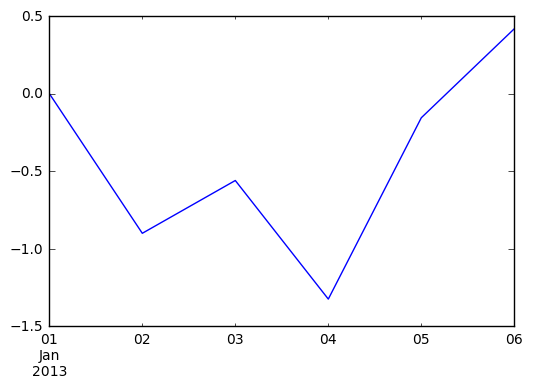

In [55]:
df['A'].plot()

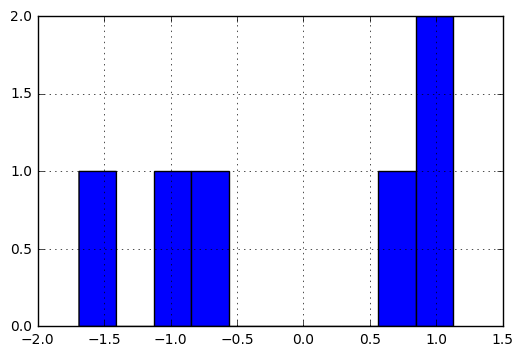

In [54]:
df['C'].hist()

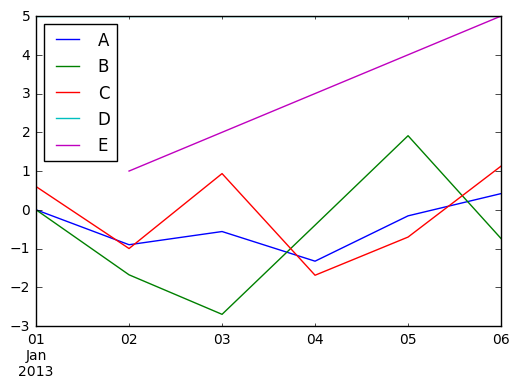

In [56]:
df.plot()

DataFrame이나, Series에 .plot()을 붙이면 index에 따라 data를 바로 시각화 한다

Populating the interactive namespace from numpy and matplotlib


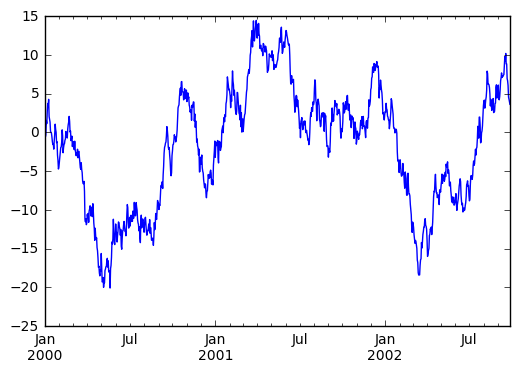

In [19]:
%pylab inline
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

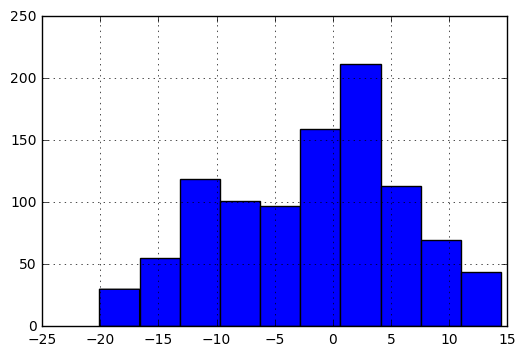

In [20]:
ts.hist()

.hist()를 이용하면 별다른 수고 없이 바로 히스토그램을 얻을 수 있다.

## Data 읽기, 저장

### csv r/w

In [57]:
df.to_csv('foo.csv')

In [58]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D,E
0,2013-01-01,0.000000,0.000000,0.599295,5,NaN
1,2013-01-02,-0.901598,-1.678151,-0.999941,5,1.0
2,2013-01-03,-0.561013,-2.697689,0.934477,5,2.0
3,2013-01-04,-1.326012,-0.396102,-1.688932,5,3.0
4,2013-01-05,-0.156187,1.911771,-0.703772,5,4.0
5,2013-01-06,0.418046,-0.742095,1.127069,5,5.0


In [62]:
pd.read_clipboard()

,Unnamed:,0,A,B,C,D,E
0,0,2013-01-01,0.000000,0.000000,0.599295,5,NaN
1,1,2013-01-02,-0.901598,-1.678151,-0.999941,5,1.0
2,2,2013-01-03,-0.561013,-2.697689,0.934477,5,2.0
3,3,2013-01-04,-1.326012,-0.396102,-1.688932,5,3.0
4,4,2013-01-05,-0.156187,1.911771,-0.703772,5,4.0
5,5,2013-01-06,0.418046,-0.742095,1.127069,5,5.0


In [63]:
pd.read_csv?

### excel r/w

In [64]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [65]:
df.to_excel('foo.xlsx')

In [66]:
pd.read_excel('foo.xlsx', index_col=None, na_values=['NA'])

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,5,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,5,1.0
2013-01-03,-0.561013,-2.697689,0.934477,5,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,5,3.0
2013-01-05,-0.156187,1.911771,-0.703772,5,4.0
2013-01-06,0.418046,-0.742095,1.127069,5,5.0


In [67]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.599295,5,NaN
2013-01-02,-0.901598,-1.678151,-0.999941,5,1.0
2013-01-03,-0.561013,-2.697689,0.934477,5,2.0
2013-01-04,-1.326012,-0.396102,-1.688932,5,3.0
2013-01-05,-0.156187,1.911771,-0.703772,5,4.0
2013-01-06,0.418046,-0.742095,1.127069,5,5.0
